# This a Python 3 notebook ... see the kernel in the top right!

## 1) Load the "rpy2" package; this create a bridge to R

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## 2) Make a simple Python dataframe, with time and columns for neuron 1 and 2

In [3]:
import pandas as pd

# a 2D df
data = {'time': [1,2,3,4,5,6,7,8,9,10],
        'neuron1': [1,4,1,7,2,10,1,2,2,5],
        'neuron2': [2,4,5,1,7,7,2,12,3,7]}
df = pd.DataFrame(data, columns=['time', 'neuron1', 'neuron2'])

print(df)

   time  neuron1  neuron2
0     1        1        2
1     2        4        4
2     3        1        5
3     4        7        1
4     5        2        7
5     6       10        7
6     7        1        2
7     8        2       12
8     9        2        3
9    10        5        7


## 3) Import the dataframe to R and run some descriptive statistics and plots

In [4]:
%%R -i df

# using the psych package from R
library(psych)

# item name ,item number, nvalid, mean, sd,
# median, mad, min, max, skew, kurtosis, se
describe(df)

        vars  n mean   sd median trimmed  mad min max range skew kurtosis   se
time       1 10  5.5 3.03    5.5    5.50 3.71   1  10     9 0.00    -1.56 0.96
neuron1    2 10  3.5 3.03    2.0    3.00 1.48   1  10     9 0.95    -0.53 0.96
neuron2    3 10  5.0 3.33    4.5    4.62 3.71   1  12    11 0.65    -0.66 1.05


In [5]:
import warnings
warnings.filterwarnings('ignore')

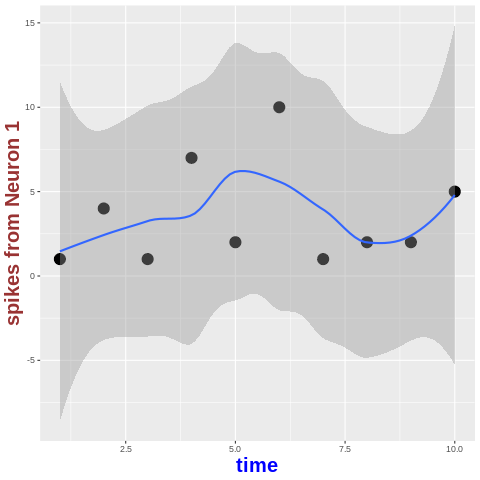

In [6]:
%%R

library(ggplot2)
# Basic scatter plot
ggplot(df, aes(x=time, y=neuron1)) + 
    geom_point(size=5) + 
    geom_smooth() +
    ylab("spikes from Neuron 1") +
    theme(axis.title.x = element_text(color="blue", size=20, face="bold"),
          axis.title.y = element_text(color="#993333", size=20, face="bold"))

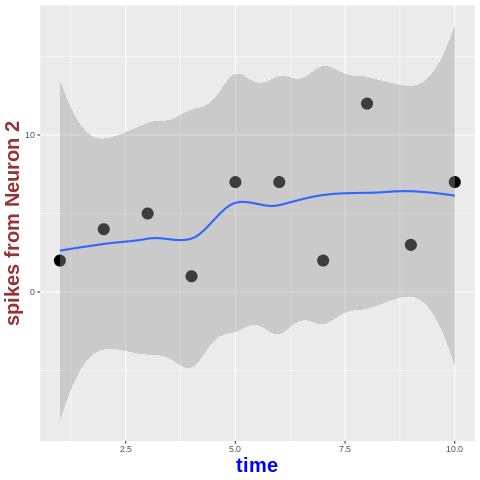

In [7]:
%%R

library(ggplot2)
# Basic scatter plot
ggplot(df, aes(x=time, y=neuron2)) + 
    geom_point(size=5) + 
    geom_smooth() +
    ylab("spikes from Neuron 2") +
    theme(axis.title.x = element_text(color="blue", size=20, face="bold"),
          axis.title.y = element_text(color="#993333", size=20, face="bold"))